In [1]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_palette("husl")

# Flipping Out

### A series of graphical representations using data gained from flipping a coin 2<sup>n</sup> times. 

### The graphs include:
1. A line plot and scatter plot showing the difference between heads and tails at each recorded point.
2. A line plot and scatter plot showing the ratio between heads and tails at each recorded point.
3. A scatter plot of the mean heads/tails ratio at each recorded point.
4. A scatter plot of the standard deviation of the heads/tails ratio at each recorded point.
5. A histogram and box plot showing the ratio of the number of times heads was flipped to the total number of times the coin was flipped during 100,000 trials of 100 flips each.
6. A histogram and box plot showing the ratio of the number of times heads was flipped to the total number of times the coin was flipped during 100,000 trials of 1,000 flips each.

#### Function to randomly pick heads(1) or tails(2) when flipping a coin

In [3]:
def flip_coin():
    return random.randint(1,2)

#### Function to flip a coin 2<sup>n</sup> times and return a list of tuples including the number of times heads is flipped and how many times tails is flipped at each record point(2<sup>0</sup>, 2<sup>1</sup>, 2<sup>2</sup> , ... 2<sup>n</sup>)
###### n is defaulted to 16

In [4]:

def flip_multiple(n=16):
    heads = 0
    tails = 0
    num_of_flips = 0
    list_of_flips = []
    for i in range(2**n):
        result = flip_coin()
        num_of_flips += 1
        if result == 1:
            heads += 1
        else:    
            tails += 1
        for i in range(n + 1):
            if num_of_flips == 2**i:
                list_of_flips.append((heads, tails))
    return list_of_flips

flip_multiple()

[(0, 1),
 (0, 2),
 (2, 2),
 (3, 5),
 (7, 9),
 (13, 19),
 (26, 38),
 (52, 76),
 (120, 136),
 (266, 246),
 (507, 517),
 (1004, 1044),
 (2018, 2078),
 (4103, 4089),
 (8189, 8195),
 (16476, 16292),
 (32891, 32645)]

#### Line plot showing the difference between heads and tails at each recorded point.

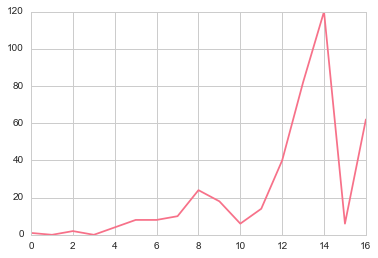

In [5]:
differences = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    differences.append(math.fabs(heads - tails))



plt.plot(differences)
plt.show()

#### Line plot showing the ratio between heads and tails at each recorded point

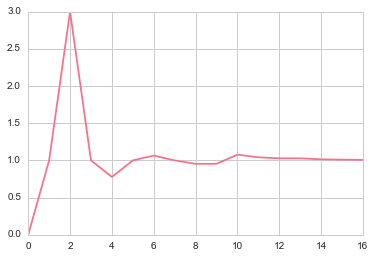

In [6]:
ratios = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    try:
        ratios.append(heads / tails)
    except ZeroDivisionError:
        ratios.append(0)

plt.plot(ratios)
plt.show()

#### Scatter plot showing the difference between heads and tails at each recorded point

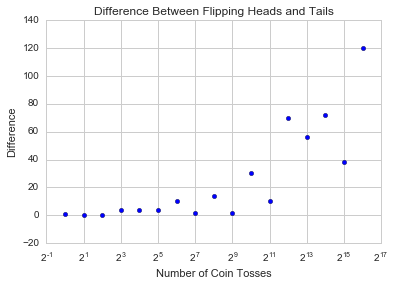

In [7]:
differences = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    differences.append(math.fabs(heads - tails))

x_values = []
for num in range(17):
    x_values.append(2**num)
    
plt.scatter(x_values, differences)
plt.xscale('log', basex=2)
plt.xlabel('Number of Coin Tosses')
plt.ylabel('Difference')
plt.title(r'Difference Between Flipping Heads and Tails')
plt.show()

#### Scatter plot showing the ratio between heads and tails at each recorded point

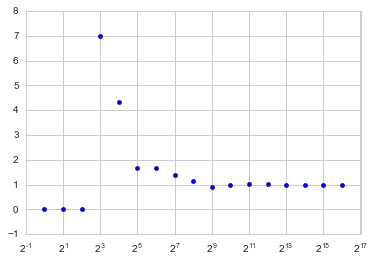

In [8]:
ratios = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    try:
        ratios.append(heads / tails)
    except ZeroDivisionError:
        ratios.append(0)

plt.scatter(x_values, ratios)
plt.xscale('log', basex=2)
plt.show()

## Observations
##### Although there are some outliers to the data, there is a clear pattern in the data.  As the number of times the coin is flipped increases, the difference between the number of times it lands on heads and tails increases, meaning there is a direct correlation between the number of times a coin is flipped and the difference between heads vs. tails being flipped. 
##### The ratio data also shows a pattern with a few outliers.  Since there is always a 50% chance of flipping heads or tails, a ratio of around 1 is to be expected. This is due to the fact that the number of times heads is flipped should be rather close to the number of times tails is flippes, meaning when you divide the two numbers, your answer should be rather close to 1 whole. The more times you flip the coin, the more accurate this data becomes due to the decreasing impact of the differences between the two possible outcomes.

#### Collecting the ratio of heads and tails flipped at each record point for 20 trials of  2<sup>16</sup> each

In [9]:
counter = 1
flip_dict = {}
while counter <= 20:
    heads = 0
    tails = 0
    num_of_flips = 0
    list_of_flips = []
    for i in range(2**16):
        result = flip_coin()
        num_of_flips += 1
        if result == 1:
            heads += 1
        else:    
            tails += 1
        for i in range(17):
            if num_of_flips == 2**i:
                try:
                    ratio = heads / tails
                except ZeroDivisionError:
                    ratio = 0
                flip_dict.setdefault(i, []).append(ratio)

    counter += 1

#### Finding the mean of the ratios at each record point
##### list[0] = sum of all ratios at record point 2<sup>0</sup> / number or trials

In [10]:
list_of_means = []
for key in flip_dict:
    list_of_means.append(sum(flip_dict[key]) / 20)

list_of_means

[0.0,
 0.55,
 1.033333333333333,
 1.0466666666666669,
 1.0946320346320344,
 0.9836076616881574,
 0.9261100789112306,
 0.9275490857378275,
 0.9613536894191306,
 0.9845845449659569,
 0.9974371982158148,
 1.0003788151878628,
 1.0099441739287878,
 1.0038553248810012,
 1.0072776814690927,
 1.0013395860604593,
 1.0008236637780574]

#### Plotting the mean of the ratios at each record point

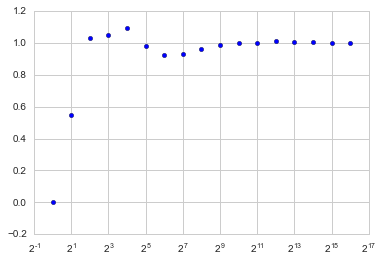

In [11]:
x_values = []
for num in range(17):
    x_values.append(2**num)

plt.scatter(x_values, list_of_means)
plt.xscale('log', basex=2)
plt.show()

## Observations:
##### The data shows that as the number of times a coin is flipped increases, the more similar the outcomes become in each trial. The first time you flip a coin, your ratio of heads to tails will always be either 0 or undefined; however, the graph shows that by about the 2<sup>5</sup> time of flipping the coin, the ratio begins to level out at around 1. Due to the fact that there are is so much data used to create this data set, the data points are much tighter around the ratio of 1. There are fewer and fewer outliers as the number of times the coin is flipped increases.

#### Finding the standard deviation of the ratios at each record point
##### list[0] = st.stdev([ratios at 2<sup>0</sup> for all 20 trials])

In [12]:
standard_deviations = []
for key in flip_dict:
    standard_deviations.append(st.stdev(flip_dict[key]))

standard_deviations


[0.0,
 0.5104177855340405,
 1.0479721437304943,
 0.6677535000597941,
 0.6929404549943965,
 0.29162902287539694,
 0.1604545623932309,
 0.141362311532892,
 0.115030498836047,
 0.0706904656861707,
 0.04455238837905926,
 0.0429522604257303,
 0.03903652287433872,
 0.02642644949501016,
 0.014455318256081491,
 0.012579259031768408,
 0.008329511718276757]

#### Plotting the mean of the ratios at each record point

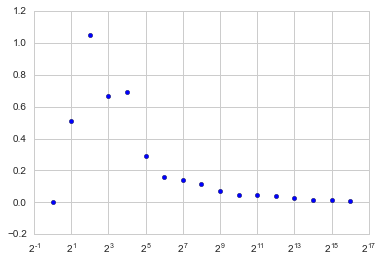

In [13]:
x_values = []
for num in range(17):
    x_values.append(2**num)

plt.scatter(x_values, standard_deviations)
plt.xscale('log', basex=2)
plt.show()

#### Histogram and box plot showing the ratio of flipping heads to the total number of times the coin is flipped 
##### Data collected over 100,000 trials of 100 coin flips each

In [14]:
counter = 1
list_of_ratios = []
while counter <= 100000:
    heads = 0
    num_of_flips = 0
    for i in range(101):
        result = flip_coin()
        num_of_flips += 1
        if result == 1:
            heads += 1
        try:
            ratio = heads / num_of_flips
        except ZeroDivisionError:
            ratio = 0
        list_of_ratios.append(ratio)
    counter += 1

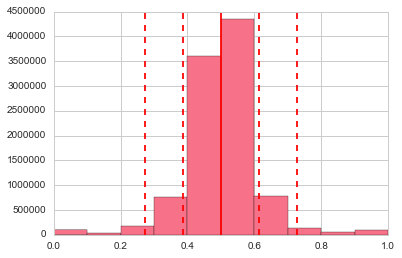

In [15]:
plt.hist(list_of_ratios)
mean = st.mean(list_of_ratios)
stdev = st.stdev(list_of_ratios)
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

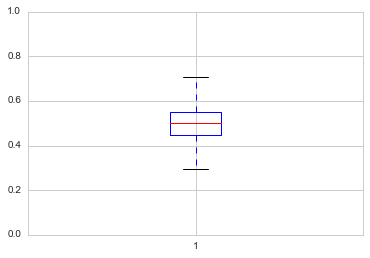

In [16]:
plt.boxplot(list_of_ratios)
plt.show()

#### Histogram and box plot showing the ratio of flipping heads to the total number of times the coin is flipped 
##### Data collected over 100,000 trials of 1000 coin flips each

In [17]:
counter = 1
list_of_ratios = []
while counter <= 100000:
    heads = 0
    num_of_flips = 0
    for i in range(1001):
        result = flip_coin()
        num_of_flips += 1
        if result == 1:
            heads += 1
        try:
            ratio = heads / num_of_flips
        except ZeroDivisionError:
            ratio = 0
        list_of_ratios.append(ratio)
    counter += 1

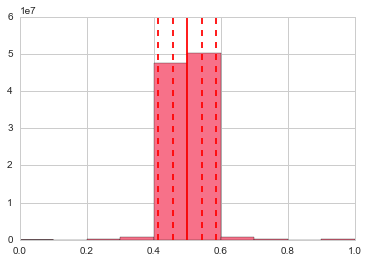

In [18]:
plt.hist(list_of_ratios)
mean = st.mean(list_of_ratios)
stdev = st.stdev(list_of_ratios)
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

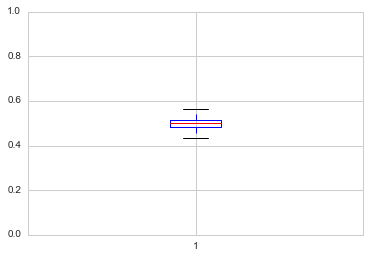

In [19]:
plt.boxplot(list_of_ratios)
plt.show()

## Observations:
##### The two histograms above show that as the number of times a coin is flipped increases, the tighter the data is to the median. There are still outliers; however, they are weighted less in the data set. Although both graphs show a normal distribution of the data, it is clear that as the number of coin flips increases, each quartile becomes closer to the median.